In [218]:
import pandas as pd
import numpy as np
from sklearn import preprocessing,metrics
import matplotlib.pyplot as plt 
#plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
%matplotlib inline
from sklearn.metrics import confusion_matrix,classification_report


In [219]:
df = pd.read_csv("df_perfect_final.csv", header=0)
df.shape

(5558, 50)

In [220]:
df.head()

,Unnamed: 0,Unnamed: 0.1,normalized_name,success,investor_participants,Round_1_amount,Round_2_amount,Round_3_amount,Round_4_amount,Round_5_amount,...,ecommerce,analytics,games_video,cleantech,other_category,Round1_Missing_fg,Round2_Missing_fg,Round3_Missing_fg,Round4_Missing_fg,Round5_Missing_fg
0,2208,2208,greatpoint energy,0,9,0,7000000,30000000,100000000,420000000,...,0,0,0,1,0,1,0,0,0,0
1,1669,1669,nanosolar,0,35,0,5000000,20000000,75000000,300000000,...,0,0,0,0,1,1,0,0,0,0
2,312,312,invenergy,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,2139,2139,solopower,0,21,0,0,0,48190000,25499999,...,0,0,0,1,0,1,1,1,0,0
4,723,723,reata pharmaceuticals,1,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [221]:
df=df.drop(['Unnamed: 0.1','Unnamed: 0','funding_velocity','normalized_name'],axis=1)

In [222]:
# remove round1_fg - round6_fg because it was derived from Round_1_amount - Round_6_amount          
df=df.drop(['round1_fg','round2_fg','round3_fg','round4_fg','round5_fg','round6_fg'],axis=1)

In [223]:
from sklearn.preprocessing import MinMaxScaler
#from sklearn import preprocessing
minmaxScaler = preprocessing.MinMaxScaler() 

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5558 entries, 0 to 5557
Data columns (total 40 columns):
success                      5558 non-null int64
investor_participants        5558 non-null int64
Round_1_amount               5558 non-null int64
Round_2_amount               5558 non-null int64
Round_3_amount               5558 non-null int64
Round_4_amount               5558 non-null int64
Round_5_amount               5558 non-null int64
Round_6_amount               5558 non-null int64
funding_rounds               5558 non-null int64
funding_total_usd            5558 non-null int64
relationships                5558 non-null int64
FounderCounter               5558 non-null int64
C_Level_Counter              5558 non-null int64
female_fg                    5558 non-null int64
dropout_fg                   5558 non-null int64
count_degrees                5558 non-null int64
school_counter               5558 non-null int64
MBA_fg                       5558 non-null int64
venture_cap

In [225]:
#minmaxscaling variables with large values 
df1=minmaxScaler.fit_transform(df[['Round_1_amount','Round_2_amount','Round_3_amount','Round_4_amount','Round_5_amount','Round_6_amount',\
                              'funding_total_usd','days_since_last_funding']])
df2=pd.DataFrame(df1,columns=['Round_1_amount','Round_2_amount','Round_3_amount','Round_4_amount','Round_5_amount','Round_6_amount',\
                              'funding_total_usd','days_since_last_funding'])
df1=df.drop(['Round_1_amount','Round_2_amount','Round_3_amount','Round_4_amount','Round_5_amount','Round_6_amount',\
                              'funding_total_usd','days_since_last_funding'],axis=1)
dff=pd.concat([df1,df2],axis=1)

In [226]:
#reduce dimension 
dff['city_ranked_top_ten_city']=dff['city_ranked_top_ten_city']*2
dff['city_ranked']=dff['city_ranked_top_ten_city']+dff['city_ranked_top_five_city']
#software label=1
dff['biotech']=dff['biotech']*2
dff['enterprise']=dff['enterprise']*3
dff['web']=dff['web']*4
dff['mobile']=dff['mobile']*5
dff['advertising']=dff['advertising']*6
dff['ecommerce']=dff['ecommerce']*7
dff['analytics']=dff['analytics']*8
dff['cleantech']=dff['cleantech']*9
dff['games_video']=dff['games_video']*10
dff['industry']=dff['software']+dff['biotech']+dff['enterprise']+dff['web']+dff['mobile']+dff['advertising']+dff['ecommerce']+dff['analytics']\
+dff['cleantech']+dff['games_video']

In [227]:
dff=dff.drop(['city_ranked_other_city','city_ranked_top_five_city','city_ranked_top_ten_city','cleantech','other_category','analytics','games_video',\
'ecommerce','advertising','mobile','web','software','enterprise','biotech'],axis=1)

In [228]:
dff.describe()

,success,investor_participants,funding_rounds,relationships,FounderCounter,C_Level_Counter,female_fg,dropout_fg,count_degrees,school_counter,...,Round_1_amount,Round_2_amount,Round_3_amount,Round_4_amount,Round_5_amount,Round_6_amount,funding_total_usd,days_since_last_funding,city_ranked,industry
count,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,...,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000
mean,0.285534,4.083483,2.229219,6.873336,1.653652,1.441706,0.226160,0.527888,2.687478,1.234797,...,0.007750,0.009790,0.021377,0.009247,0.005027,0.002691,0.027659,0.069462,0.391688,2.768082
std,0.451709,5.401918,1.519827,6.173440,1.990995,1.778069,0.418382,0.499267,3.253772,1.702901,...,0.023415,0.027425,0.060784,0.036372,0.031700,0.020680,0.059171,0.070752,0.614195,2.933553
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001422,0.020690,0.000000,0.000000
50%,0.000000,2.000000,2.000000,5.000000,1.000000,1.000000,0.000000,1.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006582,0.045610,0.000000,2.000000
75%,1.000000,6.000000,3.000000,9.000000,2.000000,2.000000,0.000000,1.000000,3.000000,2.000000,...,0.008333,0.010667,0.000000,0.000000,0.000000,0.000000,0.027045,0.092821,1.000000,5.000000
max,1.000000,54.000000,14.000000,80.000000,22.000000,21.000000,1.000000,1.000000,37.000000,17.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,10.000000


In [229]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5558 entries, 0 to 5557
Data columns (total 28 columns):
success                    5558 non-null int64
investor_participants      5558 non-null int64
funding_rounds             5558 non-null int64
relationships              5558 non-null int64
FounderCounter             5558 non-null int64
C_Level_Counter            5558 non-null int64
female_fg                  5558 non-null int64
dropout_fg                 5558 non-null int64
count_degrees              5558 non-null int64
school_counter             5558 non-null int64
MBA_fg                     5558 non-null int64
venture_capital_fg         5558 non-null int64
age                        5558 non-null int64
Round1_Missing_fg          5558 non-null int64
Round2_Missing_fg          5558 non-null int64
Round3_Missing_fg          5558 non-null int64
Round4_Missing_fg          5558 non-null int64
Round5_Missing_fg          5558 non-null int64
Round_1_amount             5558 non-null float6

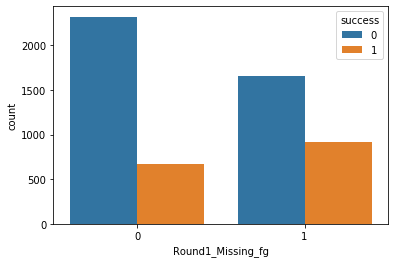

In [230]:
import seaborn as sns
sns.countplot(x="Round1_Missing_fg",hue="success",data=dff)

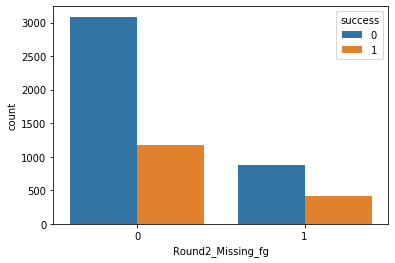

In [231]:
sns.countplot(x="Round2_Missing_fg",hue="success",data=dff)

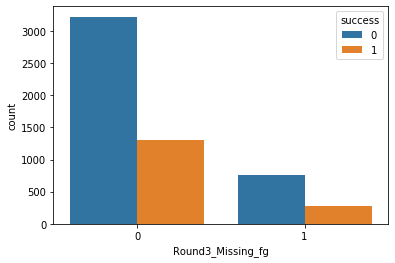

In [232]:
#see the relationship of predictor with the outcome variable
sns.countplot(x="Round3_Missing_fg",hue="success",data=dff)

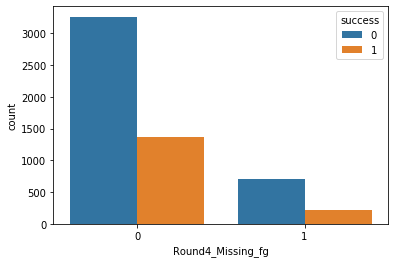

In [233]:
sns.countplot(x="Round4_Missing_fg",hue="success",data=dff)

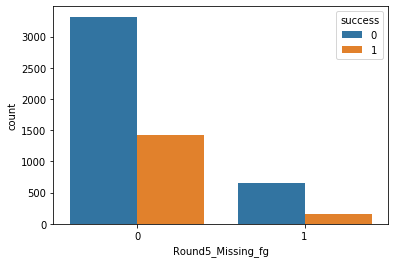

In [234]:
sns.countplot(x="Round5_Missing_fg",hue="success",data=dff)

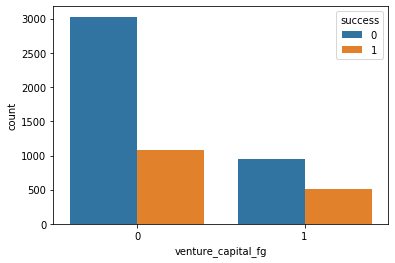

In [235]:
sns.countplot(x="venture_capital_fg",hue="success",data=dff)

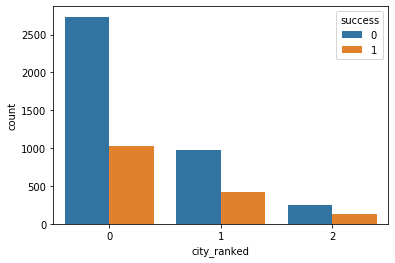

In [236]:
sns.countplot(x="city_ranked",hue="success",data=dff)

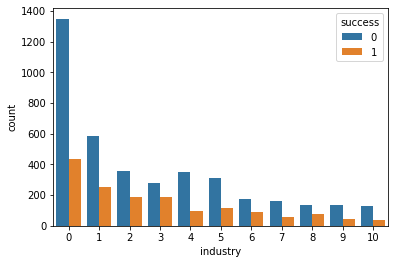

In [237]:
sns.countplot(x="industry",hue="success",data=dff)

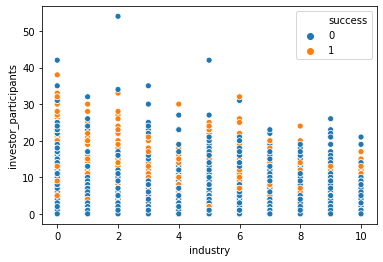

In [238]:
sns.scatterplot(x="industry",y="investor_participants",hue="success",data=dff)

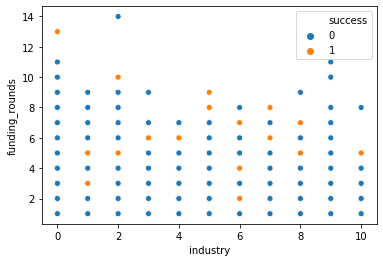

In [239]:
sns.scatterplot(x="industry",y="funding_rounds",hue="success",data=dff)

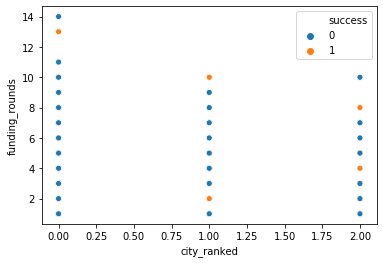

In [240]:
sns.scatterplot(x="city_ranked",y="funding_rounds",hue="success",data=dff)

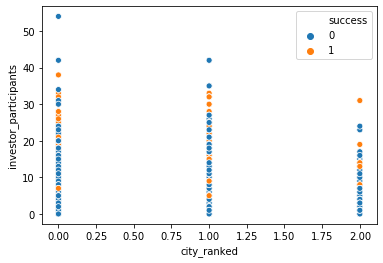

In [241]:
sns.scatterplot(x="city_ranked",y="investor_participants",hue="success",data=dff)

In [242]:
#regression
import statsmodels.api as sm
from scipy import stats
xx=dff.drop('success',axis=1)
yy=dff['success']
xx = sm.add_constant(xx)
resulteLogit= sm.Logit(yy, xx).fit()
resulteLogit.summary()

/Users/lianxinyu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Optimization terminated successfully.
         Current function value: 0.552284
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                success   No. Observations:                 5558
Model:                          Logit   Df Residuals:                     5530
Method:                           MLE   Df Model:                           27
Date:                Fri, 27 Mar 2020   Pseudo R-squ.:                 0.07661
Time:                        15:23:30   Log-Likelihood:                -3069.6
converged:                       True   LL-Null:                       -3324.3
Covariance Type:            nonrobust   LLR p-value:                 1.825e-90
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -1.9212      0.096    -20.046      0.000      -2.109      -1.733
investor_participants       0.0222      0.007      2.975      0.003       0.008       0.037
funding_rounds              0.0214      0.029      0.749      0.454      -0.035       0.078
relationships               0.0251      0.007      3.753      0.000       0.012       0.038
FounderCounter              0.0098      0.017      0.587      0.557      -0.023       0.042
C_Level_Counter             0.0319      0.020      1.608      0.108      -0.007       0.071
female_fg                  -0.1379      0.079     -1.736      0.083      -0.294       0.018
dropout_fg                  0.0291      0.070      0.414      0.679      -0.109       0.167
count_degrees              -0.0112      0.019     -0.584      0.559      -0.049       0.026
school_counter              0.0730      0.031      2.384      0.017       0.013       0.133
MBA_fg                      0.0133      0.059      0.224      0.823      -0.103       0.130
venture_capital_fg          0.0625      0.081      0.775      0.439      -0.096       0.220
age                         0.0572      0.012      4.667      0.000       0.033       0.081
Round1_Missing_fg           0.3807      0.087      4.360      0.000       0.210       0.552
Round2_Missing_fg           0.0708      0.115      0.614      0.539      -0.155       0.297
Round3_Missing_fg           0.1285      0.157      0.820      0.412      -0.179       0.436
Round4_Missing_fg          -0.2652      0.241     -1.102      0.271      -0.737       0.207
Round5_Missing_fg          -0.3797      0.243     -1.565      0.118      -0.855       0.096
Round_1_amount              2.2366      1.457      1.535      0.125      -0.620       5.093
Round_2_amount              4.2421      1.520      2.790      0.005       1.262       7.222
Round_3_amount              0.7133      0.651      1.095      0.273      -0.563       1.990
Round_4_amount             -0.5681      1.119     -0.508      0.612      -2.761       1.625
Round_5_amount             -1.3125      1.291     -1.017      0.309      -3.842       1.218
Round_6_amount             -0.4850      1.593     -0.305      0.761      -3.607       2.636
funding_total_usd           1.9335      0.987      1.958      0.050      -0.002       3.869
days_since_last_funding    -1.1948      0.524     -2.281      0.023      -2.221      -0.168
city_ranked                 0.1624      0.051      3.174      0.002       0.062       0.263
industry                    0.0031      0.011      0.287      0.774      -0.018       0.024
===========================================================================================
"""

<function matplotlib.pyplot.show(*args, **kw)>

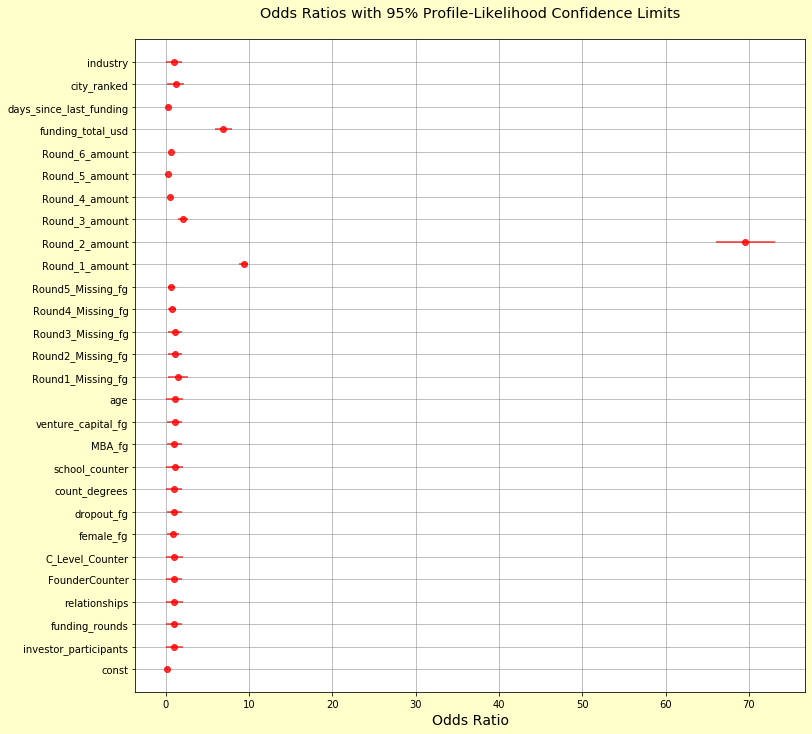

In [243]:
#resulteLogit  OR   
params =resulteLogit.params
conf =resulteLogit.conf_int()
conf['OR'] = params
conf=conf.dropna()
conf=np.exp(conf)
conf.columns = ['2.5%', '97.5%', 'OR']
plt.figure(figsize=(12,12),facecolor='#ffffcc',edgecolor='#ffffcc') 
plt.title('Odds Ratios with 95% Profile-Likelihood Confidence Limits\n',fontsize='x-large' )
yl=len(conf)
plt.ylim(0,yl+1) 
y=np.arange(1,yl+1)
plt.yticks(y,conf.index) #y axis 
plt.xlabel(u'Odds Ratio',fontproperties='SimHei',fontsize=14)
plt.grid( color='grey', linewidth=0.5)
x=conf['OR'] 
plt.errorbar(x=conf['OR'],y=y,xerr=conf['2.5%'],alpha=0.8, color='red',fmt='o')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

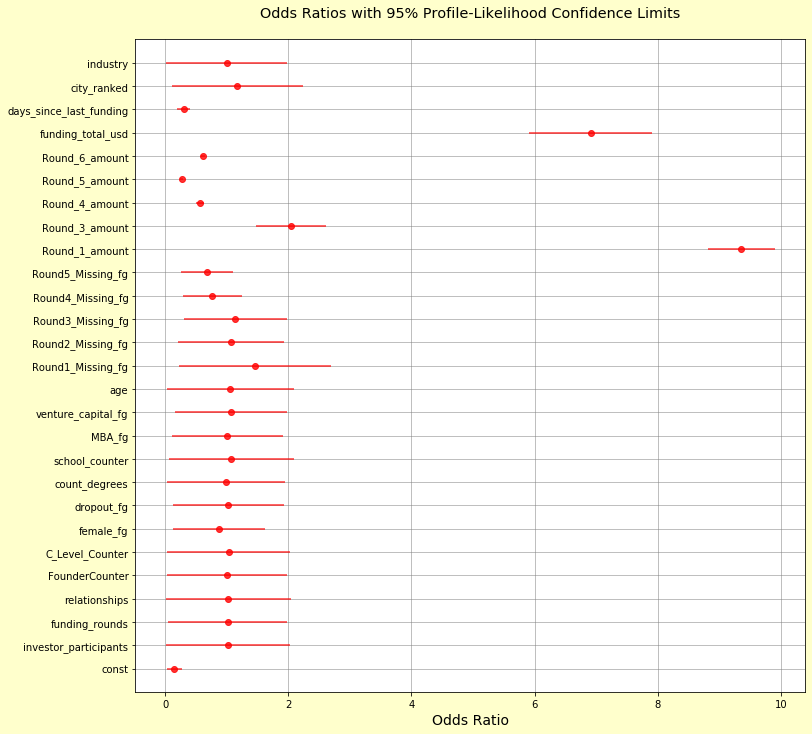

In [244]:
#Not showing Round_2_amount, in order to see other intervals. Round_1_amount、Round_3_amount have large impact 
plt.figure(figsize=(12,12),facecolor='#ffffcc',edgecolor='#ffffcc')
plt.title('Odds Ratios with 95% Profile-Likelihood Confidence Limits\n',fontsize='x-large' )
conf1=conf.drop(['Round_2_amount'])
yl=len(conf1)
plt.ylim(0,yl+1)
y=np.arange(1,yl+1)
plt.yticks(y,conf1.index) 
plt.xlabel(u'Odds Ratio',fontproperties='SimHei',fontsize=14)
x=conf['OR'] 
plt.grid( color='grey', linewidth=0.5)
plt.errorbar(x=conf1['OR'],y=y,xerr=conf1['2.5%'],alpha=0.8, color='red',fmt='o')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

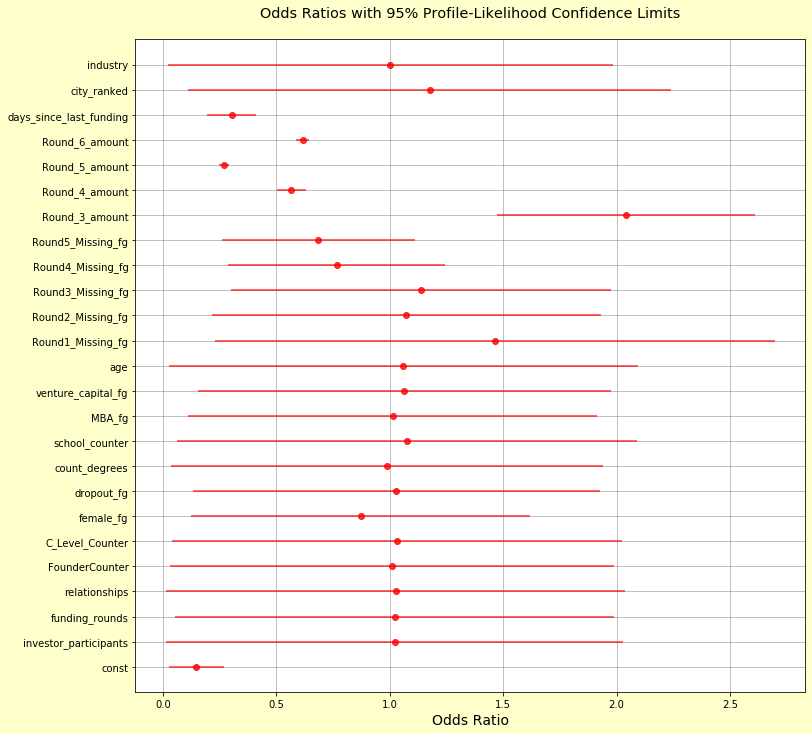

In [253]:
#Not showing Round_2_amount, in order to see other intervals. Round_1_amount、Round_3_amount have large impact 
plt.figure(figsize=(12,12),facecolor='#ffffcc',edgecolor='#ffffcc')
plt.title('Odds Ratios with 95% Profile-Likelihood Confidence Limits\n',fontsize='x-large' )
conf1=conf.drop(['Round_1_amount','funding_total_usd','Round_2_amount'])
yl=len(conf1)
plt.ylim(0,yl+1)
y=np.arange(1,yl+1)
plt.yticks(y,conf1.index) 
plt.xlabel(u'Odds Ratio',fontproperties='SimHei',fontsize=14)
x=conf['OR'] 
plt.grid( color='grey', linewidth=0.5)
plt.errorbar(x=conf1['OR'],y=y,xerr=conf1['2.5%'],alpha=0.8, color='red',fmt='o')
plt.show

In [254]:
#Use balanced dataset 
from imblearn.over_sampling import RandomOverSampler
x_train, x_test, y_train, y_test = train_test_split(dff.drop('success',axis=1), 
                                                    dff['success'], test_size=0.30, 
                                                    random_state=150)
model_RandomOverSampler=RandomOverSampler(random_state=150)  
x_train,y_train=model_RandomOverSampler.fit_sample(x_train,y_train)   


In [255]:
sum(y_train)

2768

In [256]:
logmodel = LogisticRegression(class_weight={1:0.47,0:0.53})
#logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)
predictions = logmodel.predict(x_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.77      0.79      1203
           1       0.46      0.50      0.48       465

    accuracy                           0.70      1668
   macro avg       0.63      0.64      0.63      1668
weighted avg       0.70      0.70      0.70      1668



/Users/lianxinyu/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [248]:
from sklearn.metrics import f1_score
f1_score(y_test,predictions)

0.4773662551440329

In [249]:

f1_score(y_test,predictions,average='weighted')

0.6993181164788043

In [250]:

f1_score(y_test,predictions,average='macro')

0.6312381191117796

In [214]:
from sklearn.metrics import confusion_matrix,classification_report
c2=confusion_matrix(y_test, predictions,labels=[1,0])
c2

array([[240, 225],
       [297, 906]])

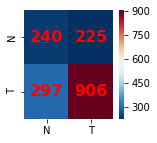

In [215]:
import seaborn as sns
sns.set_context({"figure.figsize":(2,2)})
sns.heatmap(c2,annot=True,annot_kws={'size':16,'weight':'bold', 'color':'red'},fmt='d',xticklabels=('N','T'), yticklabels=('N','T'),\
           cmap="RdBu_r")

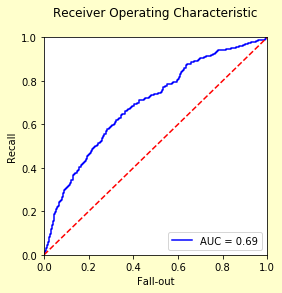

In [216]:
from sklearn.metrics import roc_curve,auc
# LogisticRegression 
plt.figure(figsize=(4,4),facecolor='#ffffcc',edgecolor='#ffffcc')
predictions=logmodel.predict_proba(x_test)
false_positive_rate, recall, thresholds = roc_curve(y_test, predictions[:
, 1])
roc_auc=auc(false_positive_rate,recall)
plt.title('Receiver Operating Characteristic\n')
plt.plot(false_positive_rate, recall, 'b', label='AUC = %0.2f' % roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()

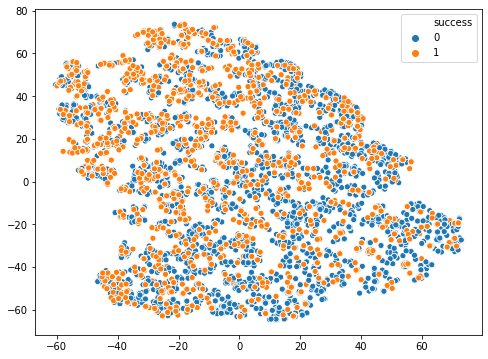

In [123]:
from sklearn import manifold
# Reduce dimension of data via t-TSNE algorithm
tsne = manifold.TSNE(n_components=2, init='random', random_state=0, perplexity=50)
reduced_data = tsne.fit_transform(x_train)

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(reduced_data[:, 0], reduced_data[:, 1], hue=y_train);

In [200]:
#Use selected variables with p value <.05 
dff_cs=dff[['success', 'investor_participants',  'relationships', 'school_counter',\
            'age', 'Round1_Missing_fg','Round_2_amount','Round_3_amount',\
            'days_since_last_funding','city_ranked']]

In [201]:
from imblearn.over_sampling import RandomOverSampler
x_train, x_test, y_train, y_test = train_test_split(dff_cs.drop('success',axis=1), 
                                                    dff_cs['success'], test_size=0.30, 
                                                    random_state=150)
model_RandomOverSampler=RandomOverSampler(random_state=150)  
x_train,y_train=model_RandomOverSampler.fit_sample(x_train,y_train)   

In [202]:
#use  imbalanced dataset 
x_train, x_test, y_train, y_test = train_test_split(dff_cs.drop('success',axis=1), 
                                                    dff_cs['success'], test_size=0.30, 
                                                    random_state=12345)

In [203]:
logmodel = LogisticRegression(class_weight={1:0.49,0:0.51})
#logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)
predictions = logmodel.predict(x_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.75      0.94      0.83      1207
           1       0.50      0.17      0.25       461

    accuracy                           0.72      1668
   macro avg       0.62      0.55      0.54      1668
weighted avg       0.68      0.72      0.67      1668



/Users/lianxinyu/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [204]:
f1_score(y_test,predictions)

0.250814332247557

In [205]:
f1_score(y_test,predictions,average='weighted')

0.6706537103101183

In [206]:
f1_score(y_test,predictions,average='macro')

0.5409104725161371

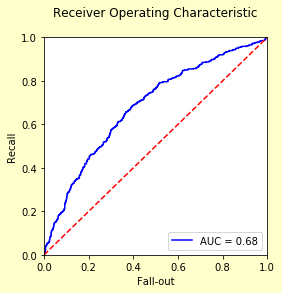

In [207]:
from sklearn.metrics import roc_curve,auc
# LogisticRegression 
plt.figure(figsize=(4,4),facecolor='#ffffcc',edgecolor='#ffffcc')
predictions=logmodel.predict_proba(x_test)
false_positive_rate, recall, thresholds = roc_curve(y_test, predictions[:
, 1])
roc_auc=auc(false_positive_rate,recall)
plt.title('Receiver Operating Characteristic\n')
plt.plot(false_positive_rate, recall, 'b', label='AUC = %0.2f' % roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()